<img src="imgs\banner_fcd.jpg" alt="bannersp" width="1100"  height="150">

## <span style="color:#2F749F;"><strong>📦 Sesión práctica 4: Introducción a datos atípicos</strong></span>
---
<p align="right">
  <a href="https://github.com/mariabda2/intro_data_2025/blob/main/sesiones_practicas/sp_4_maria_bernarda_salazar.ipynb?clone=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>


## <span style="color:black;"><strong>Datos del estudiante</strong></span>

Integrantes:
* Nelson Garcia (nelson.garcia@udea.edu.co)
* Cristian Carvajal (cristian.carvajalm@udea.edu.co)

# <span style="color:#2F749F;"><strong>Ejercicio 1: Intervalo IQR</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

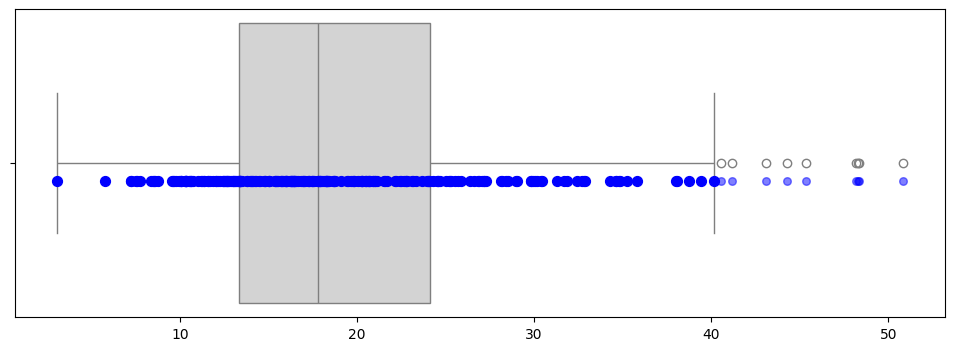

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
total_bill = tips["total_bill"].values
Q1, Q3 = np.percentile(total_bill, [25, 75])
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR
data_a = total_bill[(total_bill < lim_inf) | (total_bill > lim_sup)]
data_b = total_bill[(total_bill >= lim_inf) & (total_bill <= lim_sup)]

plt.figure(figsize=(12,4))
sns.boxplot(x=total_bill, color="lightgray")
plt.scatter(data_a, [0.05]*len(data_a), color="blue", s=30, alpha=0.5)
plt.scatter(data_b, [0.05]*len(data_b), color="blue", s=50, zorder=5)
plt.show()


In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


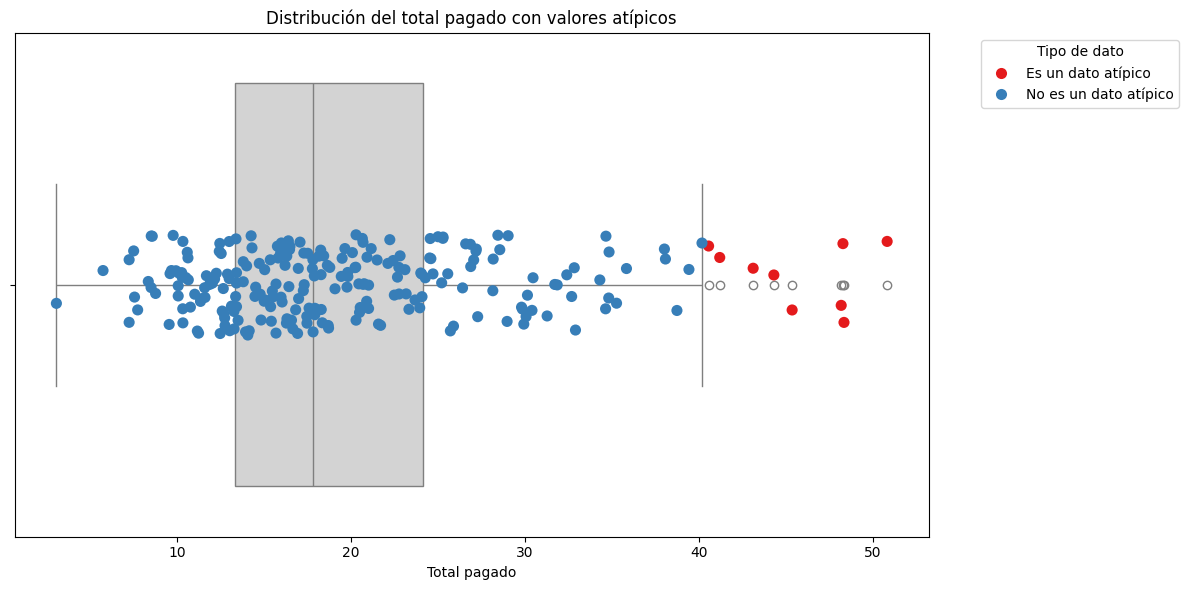

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

tips = sns.load_dataset("tips")
total_bill = tips["total_bill"].values
Q1, Q3 = np.percentile(total_bill, [25, 75])
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR
data_a = total_bill[(total_bill < lim_inf) | (total_bill > lim_sup)]
data_b = total_bill[(total_bill >= lim_inf) & (total_bill <= lim_sup)]

# Combinar todo
datos = np.concatenate([data_a, data_b])
df = pd.DataFrame({'Desempeño': datos})

# Clasificación para visualización
df['Outliers'] = "No es un dato atipico"
df.loc[df['Desempeño'].isin(data_a), 'Outliers'] = "Es un dato atípico"
df.loc[df['Desempeño'].isin(data_b), 'Outliers'] = "No es un dato atípico"

plt.figure(figsize=(12, 6))
sns.boxplot(x='Desempeño', data=df, color='lightgray')
sns.stripplot(x='Desempeño', data=df, hue='Outliers', jitter=True, size=8, palette='Set1', dodge=False)
plt.title('Distribución del total pagado con valores atípicos')
plt.xlabel('Total pagado')
plt.legend(title='Tipo de dato', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Análisis

Tras visualizar todos los datos, podemos evidenciar la existencia de algunos clientes que presentan consumos superiores a los 40 dólares, lo cual es un consumo que se puede considerar relativamente alto y fuera de lo común teniendo en cuenta el comportamiento promedio de los clientes del restaurante.

# <span style="color:#2F749F;"><strong>Ejercicio 2: Graficos de dispersión</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

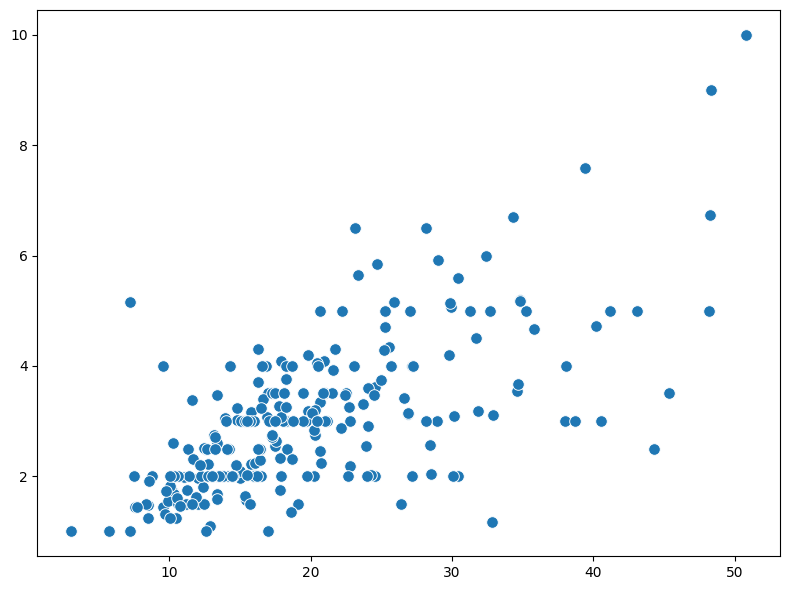

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

tips = sns.load_dataset("tips")

x = tips["total_bill"].values
y = tips["tip"].values

plt.figure(figsize=(8,6))
sns.scatterplot(x=x, y=y, s=70)
plt.tight_layout()
plt.show()


In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


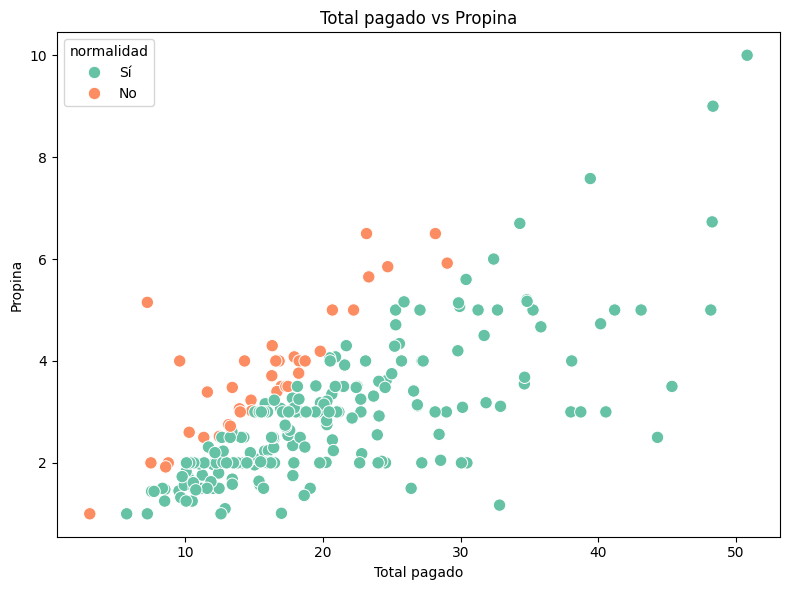

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

tips = sns.load_dataset("tips")
tips['porcentaje_propina'] = tips['tip'] / tips['total_bill']
tips['normalidad'] = np.where(tips['porcentaje_propina'] < 0.2 , 'Sí', 'No')

x = tips["total_bill"].values
y = tips["tip"].values

plt.figure(figsize=(8,6))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='normalidad', palette='Set2', s=80)
plt.xlabel('Total pagado')
plt.ylabel('Propina')
plt.title('Total pagado vs Propina')
plt.tight_layout()
plt.show()


#### Análisis

Como premisa, asumimos que todas las propinas dadas se pueden catalogar como valores o comportamientos típicos, si el valor de la propina dejada es inferior al 20% del total pagado en la cuenta. Esto, nos permite evidenciar como la mayor cantidad de datos atípicos se encuentra en aquellas facturas inferiores a 30 dólares.


# <span style="color:#2F749F;"><strong>Ejercicio 3: Histogramas y funciones de densidad</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

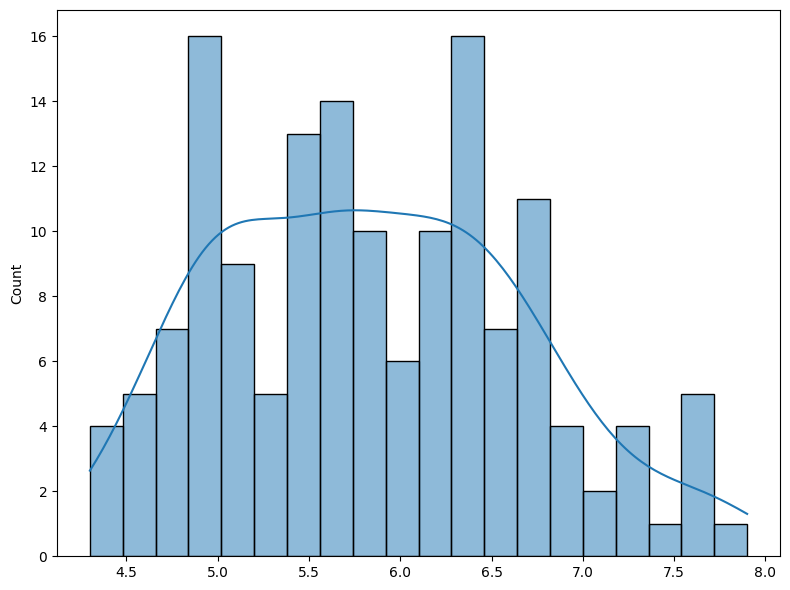

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

iris = sns.load_dataset("iris")
x = iris["sepal_length"].values

plt.figure(figsize=(8,6))
sns.histplot(x=x, bins=20, kde=True)
plt.tight_layout()
plt.show()


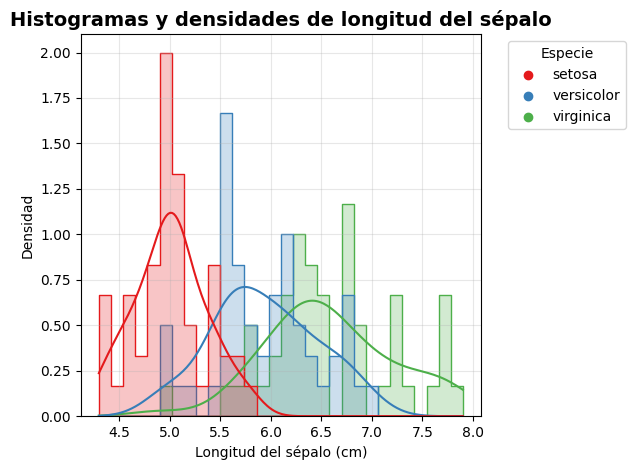

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset("iris")
species = iris["species"].unique()
palette = dict(zip(species, sns.color_palette("Set1", n_colors=len(species))))

ax = sns.histplot(
    data=iris,
    x="sepal_length",
    hue="species",
    kde=True,
    bins=30,
    element="step",
    stat="density",
    common_norm=False,
    palette=palette,
    legend=False
)

plt.title("Histogramas y densidades de longitud del sépalo", fontsize=14, weight="bold")
plt.xlabel("Longitud del sépalo (cm)")
plt.ylabel("Densidad")

for sp in species:
    ax.scatter([], [], color=palette[sp], label=sp)

ax.legend(title="Especie", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



#### Análisis

El histograma muestra la distribución de la longitud de los sépalos de tres especies diferentes de flor iris; como podemos observar las tres especies presentan atípicos, según sus distribuciones con colas pesadas. Además, evidenciamos una mayor presencia de datos considerados atípicos para su especie en las clases virginica y versicolor con respecto a la especie setosa.

# <span style="color:#2F749F;"><strong>Ejercicio 4: Z-Score</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

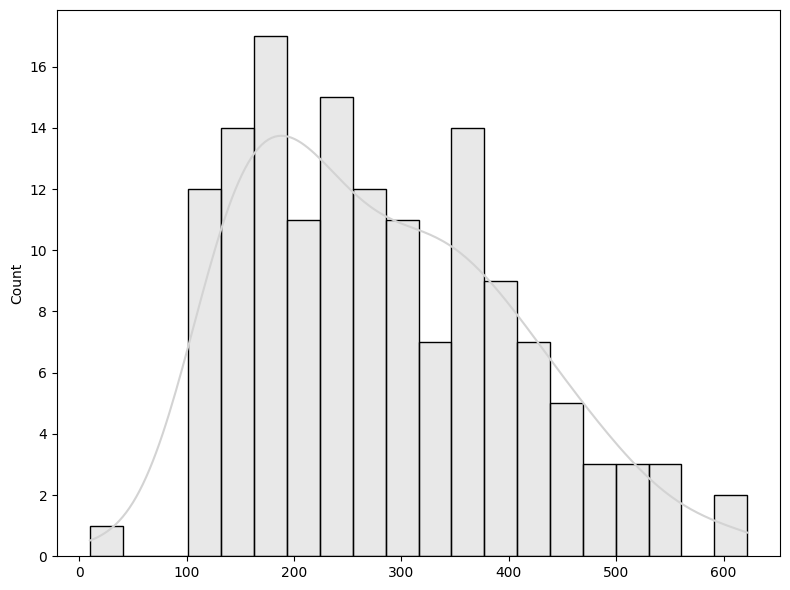

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

flights = sns.load_dataset("flights")
x = flights["passengers"].values

x = np.append(x, [10, 500])

z_scores = zscore(x)
data_b = np.abs(z_scores) > 2

plt.figure(figsize=(8,6))
sns.histplot(x=x, bins=20, kde=True, color="lightgray")
plt.scatter(x[data_b], np.zeros_like(x[data_b]), color="red", s=50, marker=" ")
plt.tight_layout()
plt.show()


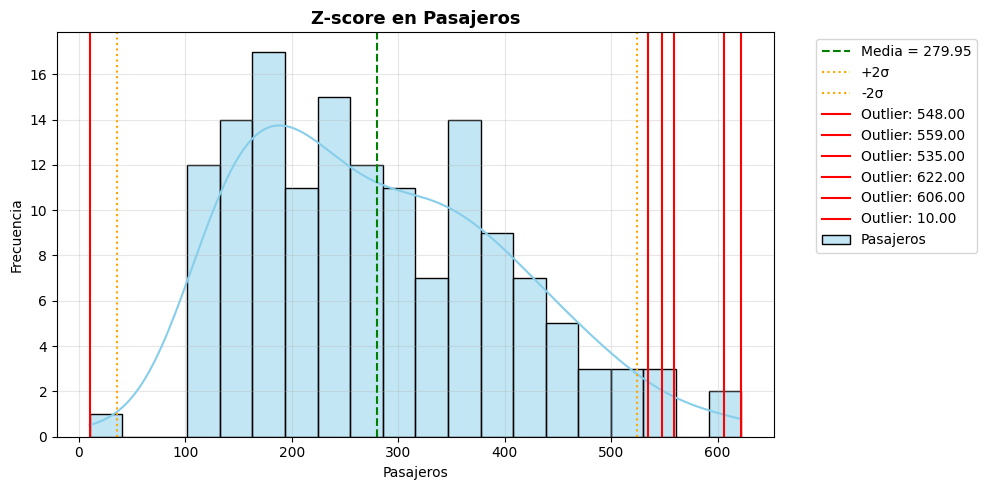

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

flights = sns.load_dataset("flights")
x = flights["passengers"].values

x = np.append(x, [10, 500])

z_scores = zscore(x)
data_b = x[np.abs(z_scores) > 2]

plt.figure(figsize=(10, 5))
sns.histplot(x, bins=20, kde=True, color="skyblue", label="Pasajeros")
plt.axvline(np.mean(x), color="green", linestyle="--", label=f"Media = {np.mean(x):.2f}")
plt.axvline(np.mean(x) + 2*np.std(x), color="orange", linestyle=":", label="+2σ")
plt.axvline(np.mean(x) - 2*np.std(x), color="orange", linestyle=":", label="-2σ")

for out in data_b:
    plt.axvline(out, color="red", linestyle="-", label=f"Outlier: {out:.2f}")

plt.title("Z-score en Pasajeros", fontsize=13, weight="bold")
plt.xlabel("Pasajeros")
plt.ylabel("Frecuencia")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### Análisis

La mayoría de los valores de pasajeros están entre 100 y 450.La curva muestra una distribución con forma de normal pero con cola pesada hacia valores altos. Los valores 10 y mayores a 500 (valores atípicos) aparecen marcados con líneas rojas, ya que están muy lejos de la distribución central.


# <span style="color:#2F749F;"><strong>Ejercicio 5: K-means</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

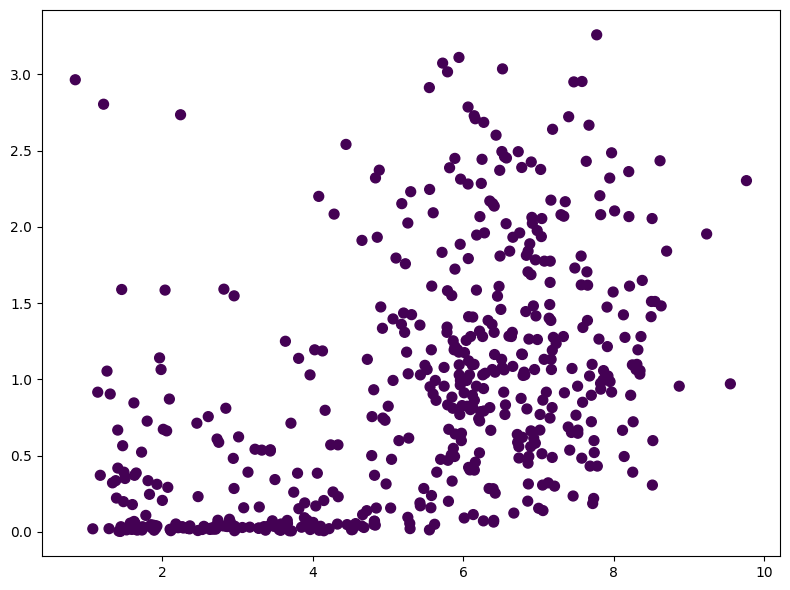

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

planets = sns.load_dataset("planets").dropna(subset=["orbital_period", "mass"])
X = planets[["orbital_period", "mass"]].values
X = np.log1p(X)

kmeans = KMeans(n_clusters=1, random_state=42).fit(X)
labels = kmeans.labels_

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis", s=50)
plt.tight_layout()
plt.show()


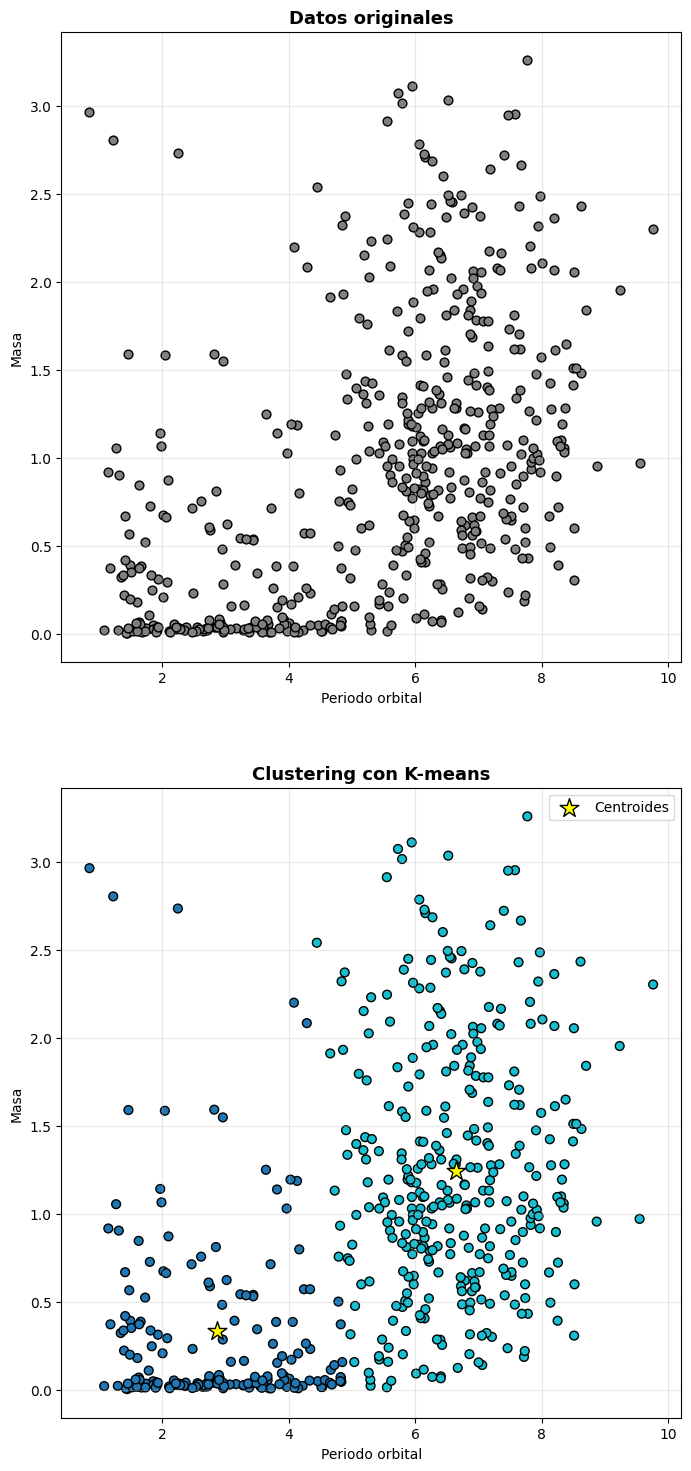

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

planets = sns.load_dataset("planets").dropna(subset=["orbital_period", "mass"])
X = planets[["orbital_period", "mass"]].values
X = np.log1p(X)

kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
labels = kmeans.labels_

# DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

# Visualización (4 filas)
fig, axes = plt.subplots(2, 1, figsize=(8, 18))

# ---- Datos originales
axes[0].scatter(X[:, 0], X[:, 1], c="gray", s=40, edgecolor="k")
axes[0].set_title("Datos originales", fontsize=13, weight="bold")
axes[0].set_xlabel("Periodo orbital"); axes[0].set_ylabel("Masa"); axes[0].grid(alpha=0.3)

# ---- K-means
axes[1].scatter(X[:, 0], X[:, 1], c=labels, cmap="tab10", s=40, edgecolor="k")
axes[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                c="yellow", s=200, edgecolor="black", marker="*",
                label="Centroides")
axes[1].set_title("Clustering con K-means", fontsize=13, weight="bold")
axes[1].set_xlabel("Periodo orbital"); axes[1].set_ylabel("Masa"); axes[1].legend(); axes[1].grid(alpha=0.3)


/tmp/ipython-input-1532347889.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


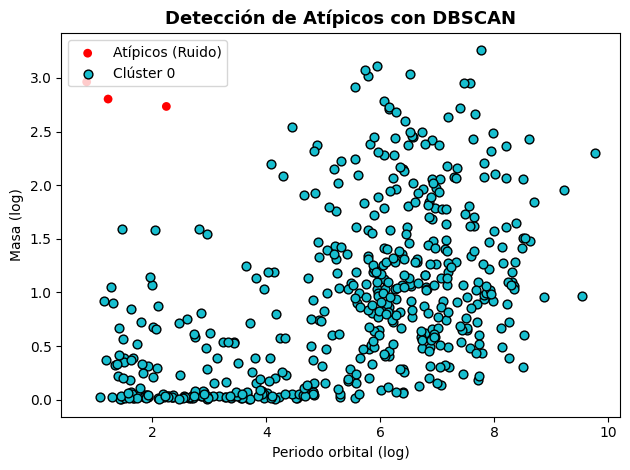

In [ ]:
# DBSCAN etiqueta los atípicos con -1
unique_labels = np.unique(labels_dbscan)
colors = plt.cm.get_cmap('tab10', len(unique_labels))
palette = {label: colors(i) for i, label in enumerate(unique_labels)}
palette[-1] = 'red' # Coloreamos los atípicos (etiqueta -1) de rojo

# Creamos el scatterplot
for label in unique_labels:
    if label == -1:
        cluster_label = 'Atípicos (Ruido)'
    else:
        cluster_label = f'Clúster {label}'

    subset = X[labels_dbscan == label]
    plt.scatter(subset[:, 0], subset[:, 1], c=[palette[label]],
                    label=cluster_label, s=40, edgecolor='k' if label != -1 else 'none')

plt.title("Detección de Atípicos con DBSCAN", fontsize=13, weight="bold")
plt.xlabel("Periodo orbital (log)")
plt.ylabel("Masa (log)")
plt.legend()

plt.tight_layout()
plt.show()

#### Análisis

Se observa cómo mediante la técnica de K-means, se crean 2 clusters separados verticalmente cada uno con un centroide distinto. Con esto, se evidencia que el cluster de los elementos con un periodo orbital bajo, presentan una aglomeración tendiendo a una masa baja, salvo algunos datos atípicos, por lo cual se utiliza la técnica DBSCAN verificando que estos datos son catalogados como ruido.
